# The Mechanics of learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
import torch

In [126]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.8, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

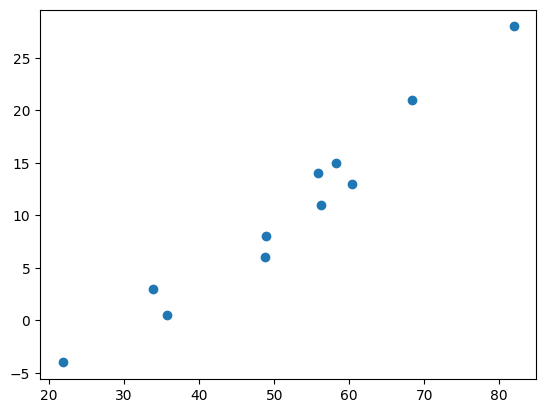

In [133]:
plt.scatter(t_u, t_c);

In [117]:
def model(t_u, w, b):
    return w * t_u + b

In [118]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c) ** 2
    return squared_diffs.mean()

In [124]:
w = torch.ones(())
b = torch.zeros(())

In [134]:
t_p = model(t_u, w, b)

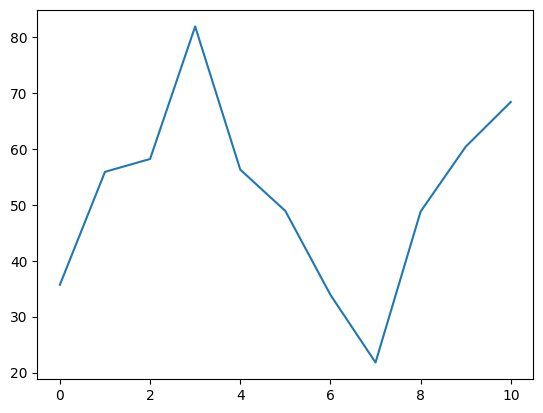

In [136]:
plt.plot(t_p)

In [137]:
loss = loss_fn(t_p, t_c)
loss

tensor(1766.9829)

In [156]:
delta = 0.1

loss_rate_of_change_w = \
    (loss_fn(model(t_u, w + delta, b), t_c) - 
     loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

In [157]:
learning_rate = 1e-2

w = w - learning_rate * loss_rate_of_change_w

In [158]:
loss_rate_of_change_b = \
    (loss_fn(model(t_u, w, b + delta), t_c) - 
     loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)

b = b - learning_rate * loss_rate_of_change_b

In [159]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)  # <1>
    return dsq_diffs

In [160]:
def dmodel_dw(t_u, w, b):
    return t_u

In [161]:
def dmodel_db(t_u, w, b):
    return 1.0

In [162]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])  # <1>

In [163]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b)  # <1>
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)  # <2>

        params = params - learning_rate * grad

        print('Epoch %d, Loss %f' % (epoch, float(loss))) # <3>
            
    return params

In [164]:
training_loop(n_epochs=100, learning_rate=1e-2, params=torch.tensor([1.0, 0.0]), t_u=t_u, t_c=t_c)

Epoch 1, Loss 1766.982910
Epoch 2, Loss 5826769.500000
Epoch 3, Loss 19536936960.000000
Epoch 4, Loss 65506908307456.000000
Epoch 5, Loss 219643270307774464.000000
Epoch 6, Loss 736459080733852434432.000000
Epoch 7, Loss 2469333043174467887431680.000000
Epoch 8, Loss 8279617130282053310038933504.000000
Epoch 9, Loss 27761375993961510769583322038272.000000
Epoch 10, Loss 93083306276190085026721338966933504.000000
Epoch 11, Loss inf
Epoch 12, Loss inf
Epoch 13, Loss inf
Epoch 14, Loss inf
Epoch 15, Loss inf
Epoch 16, Loss inf
Epoch 17, Loss inf
Epoch 18, Loss inf
Epoch 19, Loss inf
Epoch 20, Loss inf
Epoch 21, Loss inf
Epoch 22, Loss inf
Epoch 23, Loss nan
Epoch 24, Loss nan
Epoch 25, Loss nan
Epoch 26, Loss nan
Epoch 27, Loss nan
Epoch 28, Loss nan
Epoch 29, Loss nan
Epoch 30, Loss nan
Epoch 31, Loss nan
Epoch 32, Loss nan
Epoch 33, Loss nan
Epoch 34, Loss nan
Epoch 35, Loss nan
Epoch 36, Loss nan
Epoch 37, Loss nan
Epoch 38, Loss nan
Epoch 39, Loss nan
Epoch 40, Loss nan
Epoch 41, Loss

tensor([nan, nan])

In [165]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c,
                  print_params=True):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b)  # <1>
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)  # <2>

        params = params - learning_rate * grad

        if epoch in {1, 2, 3, 10, 11, 99, 100, 4000, 5000}:  # <3>
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            if print_params:
                print('    Params:', params)
                print('    Grad:  ', grad)
        if epoch in {4, 12, 101}:
            print('...')

        if not torch.isfinite(loss).all():
            break  # <3>
            
    return params

In [166]:
training_loop(
    n_epochs = 100, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_u, 
    t_c = t_c)

Epoch 1, Loss 1766.982910
    Params: tensor([-44.2393,  -0.8267])
    Grad:   tensor([4523.9292,   82.6727])
Epoch 2, Loss 5826769.500000
    Params: tensor([2575.3691,   45.2639])
    Grad:   tensor([-261960.8438,   -4609.0615])
Epoch 3, Loss 19536936960.000000
    Params: tensor([-149112.7812,   -2625.3870])
    Grad:   tensor([15168816.0000,   267065.0938])
...
Epoch 10, Loss 93083306276190085026721338966933504.000000
    Params: tensor([3.2548e+17, 5.7304e+15])
    Grad:   tensor([-3.3110e+19, -5.8293e+17])
Epoch 11, Loss inf
    Params: tensor([-1.8847e+19, -3.3182e+17])
    Grad:   tensor([1.9172e+21, 3.3755e+19])


tensor([-1.8847e+19, -3.3182e+17])

In [177]:
training_loop(
    n_epochs = 40000, 
    learning_rate = 1e-4, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_u, 
    t_c = t_c)

Epoch 1, Loss 1766.982910
    Params: tensor([ 0.5476, -0.0083])
    Grad:   tensor([4523.9292,   82.6727])
Epoch 2, Loss 322.678802
    Params: tensor([ 0.3617, -0.0118])
    Grad:   tensor([1859.0814,   35.7554])
Epoch 3, Loss 78.763046
    Params: tensor([ 0.2853, -0.0135])
    Grad:   tensor([763.9599,  16.4746])
...
Epoch 10, Loss 29.194170
    Params: tensor([ 0.2321, -0.0165])
    Grad:   tensor([1.4591, 3.0497])
Epoch 11, Loss 29.193096
    Params: tensor([ 0.2321, -0.0168])
    Grad:   tensor([0.5682, 3.0339])
...
Epoch 99, Loss 29.112740
    Params: tensor([ 0.2325, -0.0434])
    Grad:   tensor([-0.0531,  3.0184])
Epoch 100, Loss 29.111830
    Params: tensor([ 0.2325, -0.0437])
    Grad:   tensor([-0.0532,  3.0183])
...
Epoch 4000, Loss 25.789318
    Params: tensor([ 0.2526, -1.1816])
    Grad:   tensor([-0.0495,  2.8195])
Epoch 5000, Loss 25.007860
    Params: tensor([ 0.2575, -1.4611])
    Grad:   tensor([-0.0488,  2.7706])


tensor([ 0.3852, -8.7152])

In [178]:
t_un = 0.1 * t_u
params = torch.tensor([1.0, 0.0])


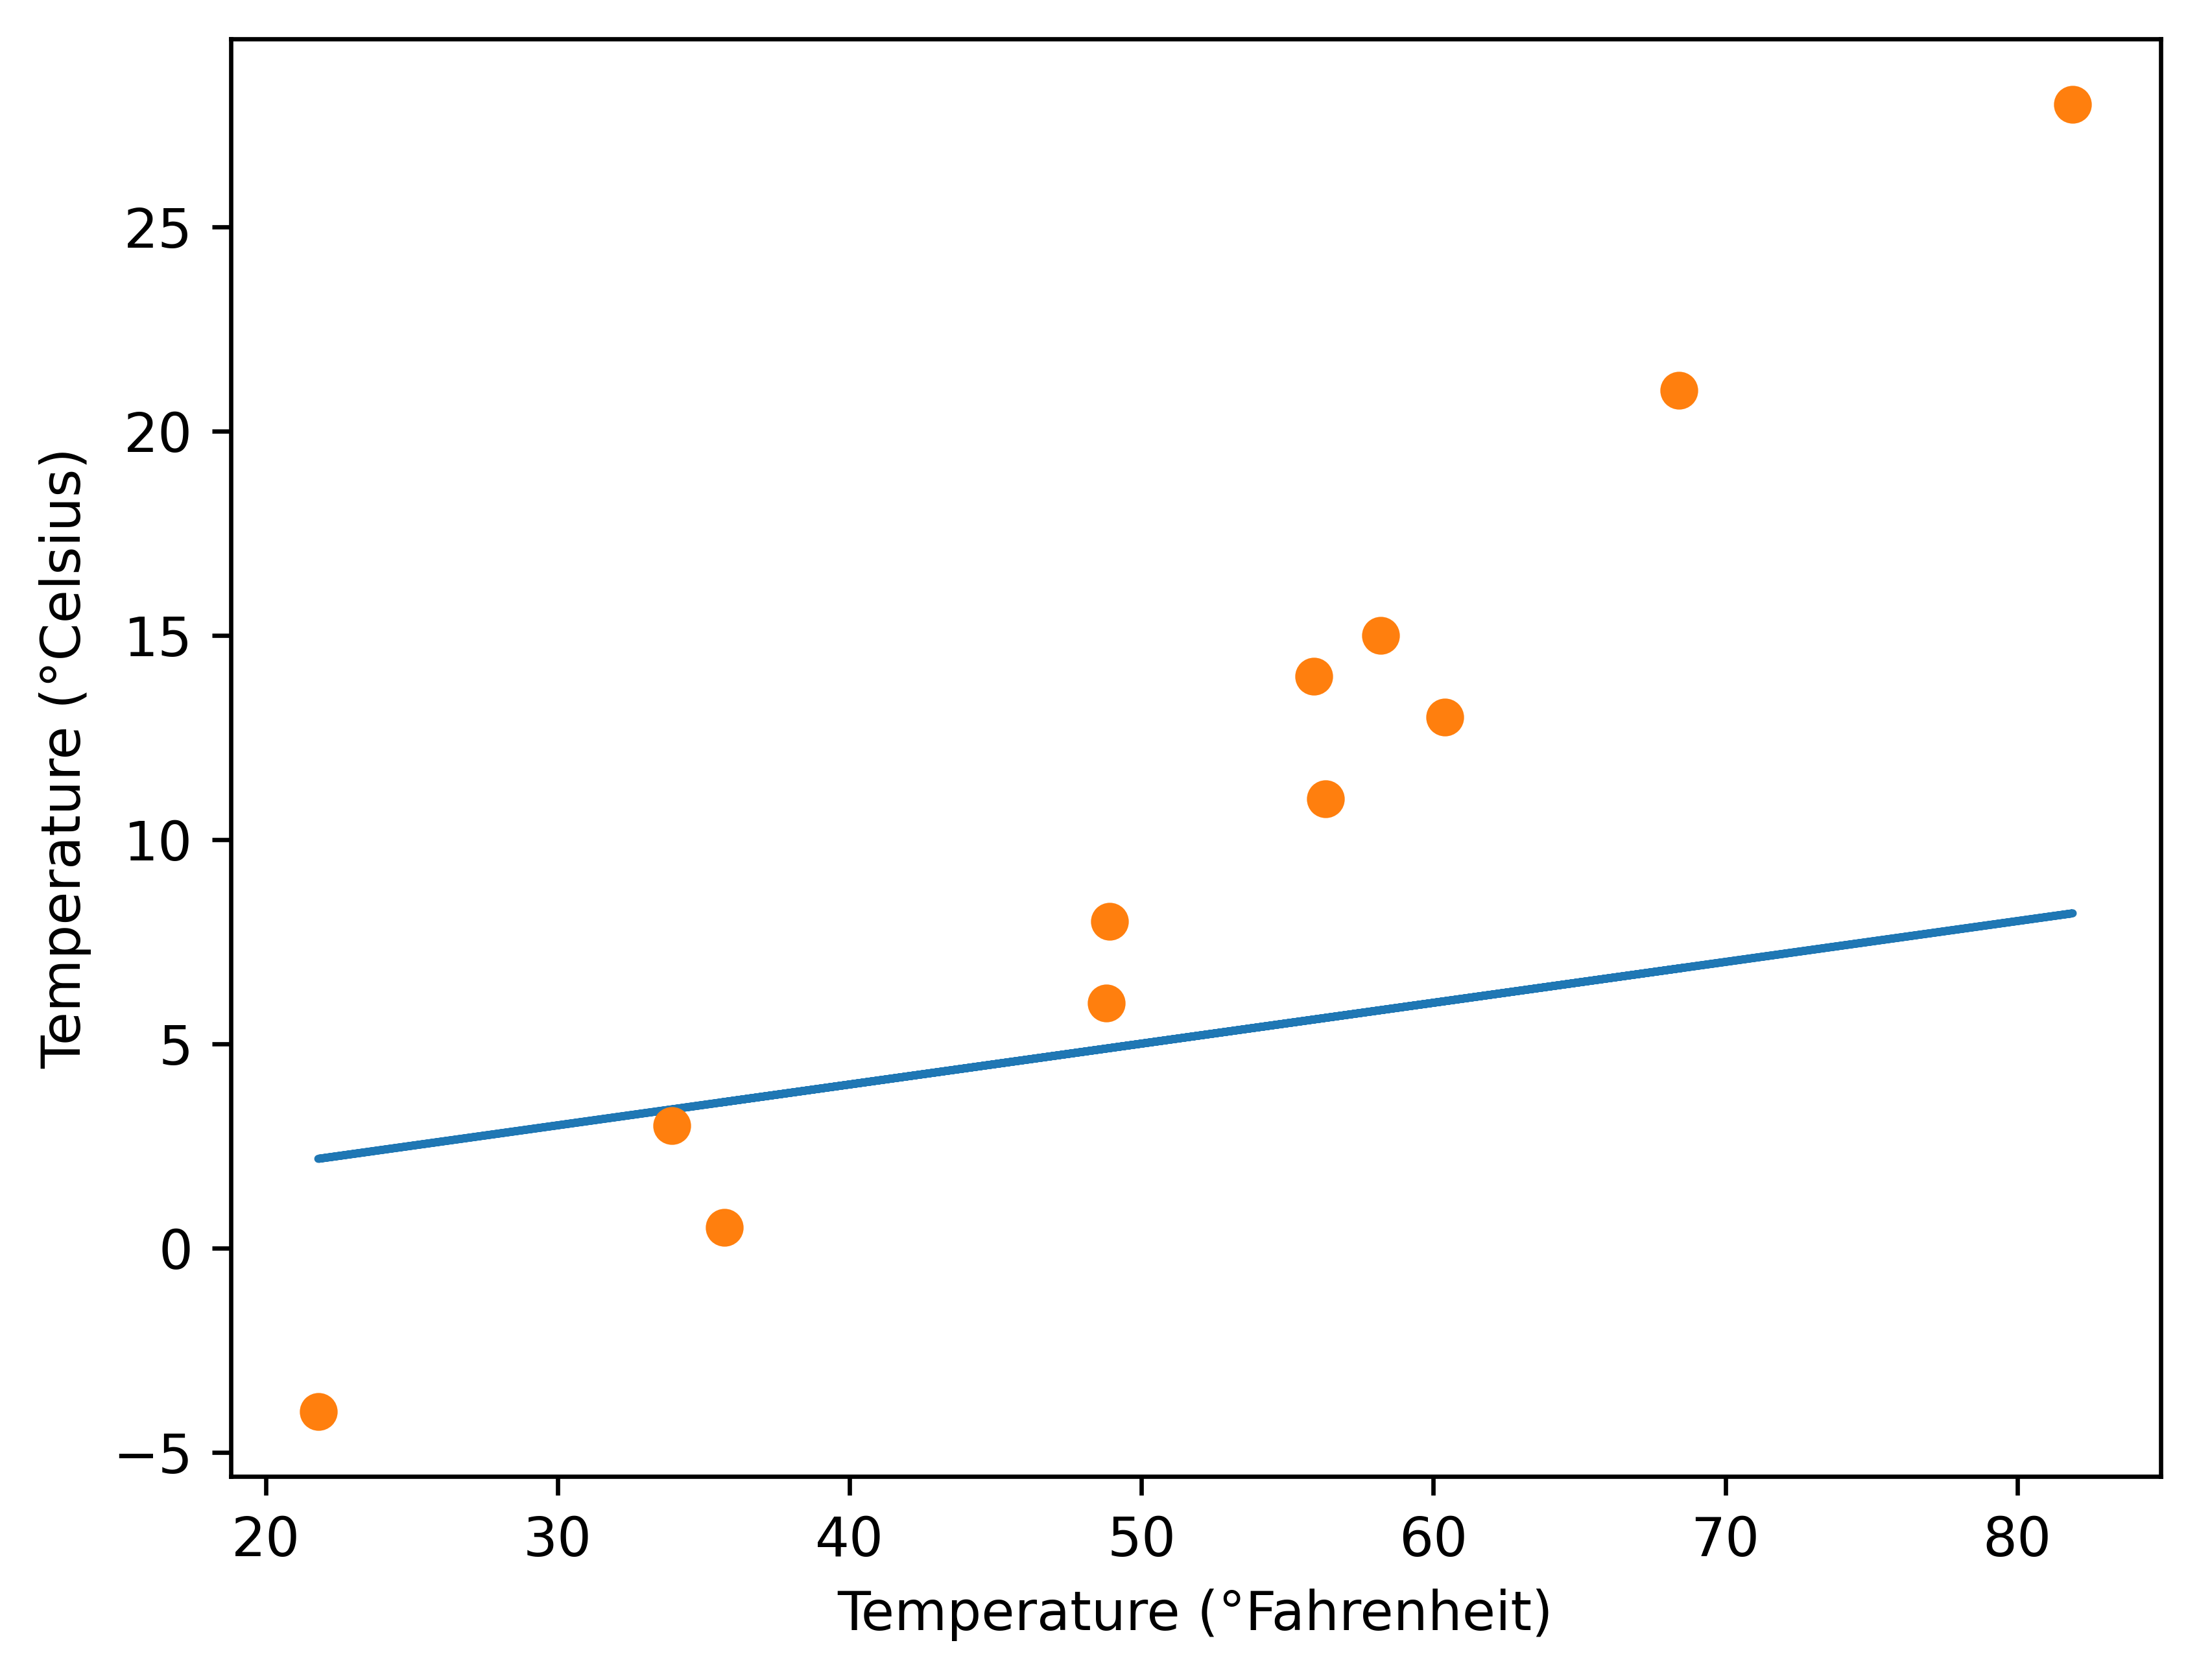

In [179]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(t_un, *params)  # <1>

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy()) # <2>
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")  # bookskip